### **MNIST Digit Classification Using Deep Learning (Neural Network)**

- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.




- Import Libraries
- Load and Visualize Data
- Normalization(image)
- Model Architecture
- Model Evaluation
- Build the PRedictive System

**Import the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
import cv2

import tensorflow as tf
from tensorflow.keras import datasets


In [3]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


### **Load the MNIST Data**

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


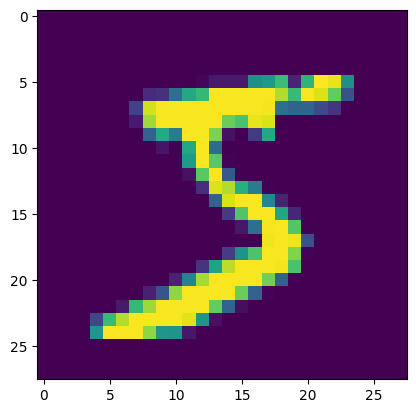

In [5]:
plt.imshow(X_train[0])
plt.show()

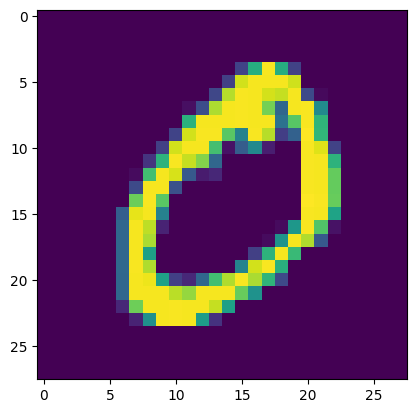

In [6]:
plt.imshow(X_train[1])
plt.show()

In [7]:
type(X_train)

numpy.ndarray

In [84]:
X_train.shape

(60000, 28, 28)

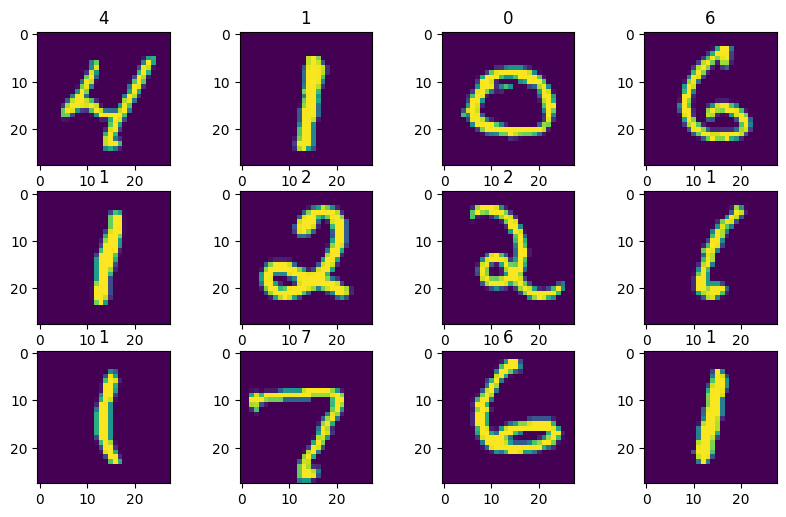

In [8]:
#print randomly 12 images

import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10,10))
for i in range(12):
  ax = plt.subplot(5, 4, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index])
  plt.title(y_train[rand_index])
  plt.axis('on')


In [9]:
#Shape of the numpy arrays
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### **Normalization**

 **All the images have the same Dimesnions in this Dataset, if not we have to resize all the images to a common dimesnsion**

In [10]:
# Scaling the pixel values
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0


In [11]:
# Check the unique values in the labels
print("Unique labels in training data:", np.unique(y_train))
print("Unique labels in testing data:", np.unique(y_test))

Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]
Unique labels in testing data: [0 1 2 3 4 5 6 7 8 9]


In [12]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**SYNTAX:-**


**Conv2D (filters,kernel_size ,strides,activation ,input_shape, padding)**


- 6 Convolutional Filter will Extract the Features
 - Each filter will Extract the one Feature

- (5,5) of the filter(kernal_size) is we have used
- strides(1,1) Means we having moving one by one

- input_shape = (28,28,1) {1-> is the grayscale}




- The output size =>> ((28 - 5 +1),(28-5+1))
 - The output size is (24X24X6)    
  6-> becaues of the filters
- Padding is valid means we are not using the padding here, pdding('same'),we are using the padding





- Flatten - Flatten the given all input
as the one vector
- Dense Layer---> The Feed formal network

In [13]:
cnn_model = Sequential()

In [14]:
cnn_model.add(Conv2D(6,kernel_size = (5,5),strides = (1,1),activation = 'relu',input_shape = (28,28,1),padding = 'valid'))
##Add the Pooling Layer
cnn_model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'))
##Add Conv2D layer
cnn_model.add(Conv2D(5,kernel_size = (3,3),strides = (1,1),activation = 'relu',padding = 'same'))
###Add the one More MaxPooling Layer
cnn_model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'))
##Flatten
cnn_model.add(Flatten())
##Dense Layer --> add the Feed Formal Network
cnn_model.add(Dense(80,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'softmax')) ##Ouput layer


In [15]:
cnn_model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 5)         275       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 5)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 180)               0         
                                                                 
 dense (Dense)               (None, 80)                1

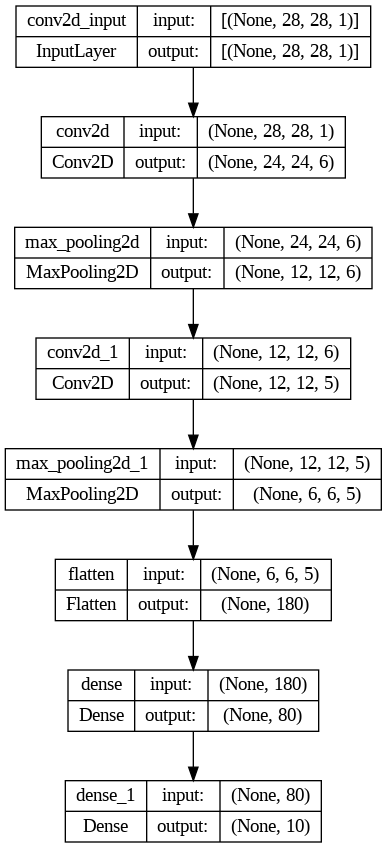

In [17]:
##Plot the model
plot_model(cnn_model,show_shapes = True,show_layer_names = True)

In [18]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [19]:
history = cnn_model.fit(X_train_scaled,y_train,epochs =20 ,callbacks = [early_stopping],validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 29s 18ms/step - loss: 0.2727 - accuracy: 0.9164 - val_loss: 0.0999 - val_accuracy: 0.9696
Epoch 2/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0944 - accuracy: 0.9699 - val_loss: 0.0832 - val_accuracy: 0.9752
Epoch 3/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0712 - accuracy: 0.9776 - val_loss: 0.0718 - val_accuracy: 0.9785
Epoch 4/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0725 - val_accuracy: 0.9785
Epoch 5/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0636 - val_accuracy: 0.9827
Epoch 6/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0647 - val_accuracy: 0.9825
Epoch 7/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0540 -

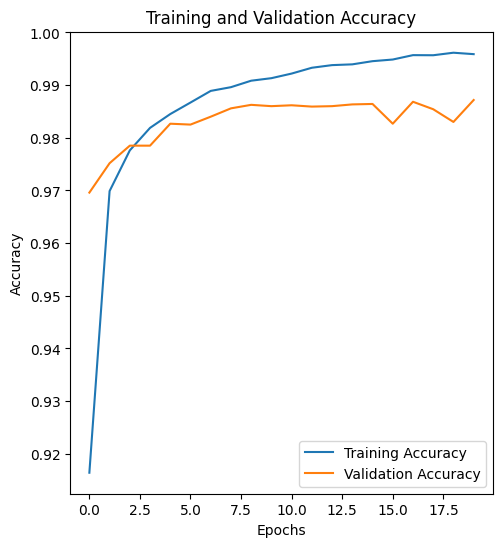

In [20]:
# Plotting training and validation metrics

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

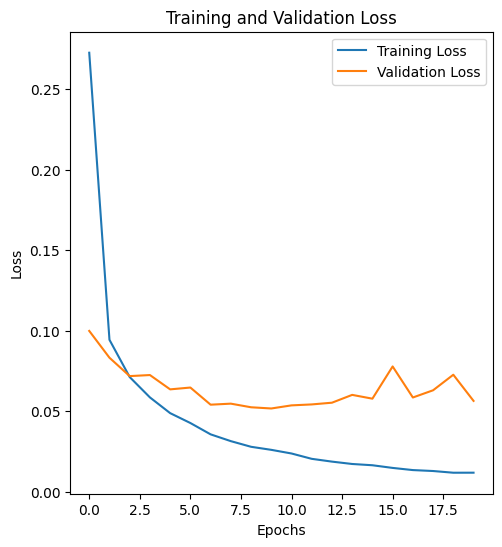

In [23]:
#Plot the loss and Validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

Accuracy on Test Data
 - To check for the Whether is Under fit or not

In [22]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

##Model is hvaing the 98.56 % Accuracy on the  test data

313/313 [==============================] - 2s 7ms/step - loss: 0.0373 - accuracy: 0.9887
Test Accuracy: 0.9886999726295471
Test Loss: 0.037339046597480774


In [24]:
print(X_test_scaled.shape)

(10000, 28, 28)


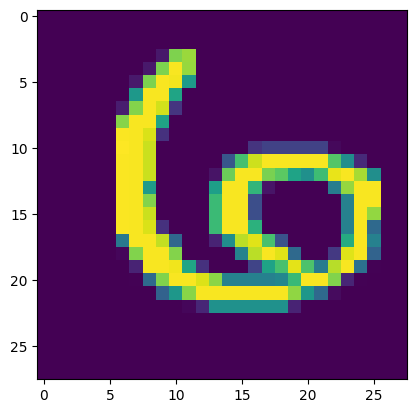

In [42]:
#First Data point in X_test
plt.imshow(X_test_scaled[54])
plt.show()

In [43]:
print(y_test[54])

6


In [44]:
#Predict the Model
y_pred = cnn_model.predict(X_test_scaled)
print(y_pred.shape)

313/313 [==============================] - 4s 14ms/step
(10000, 10)


In [45]:
print(y_pred[54])  ##It gives the probality of  number [ 0 to  9 ]
#here, it is  7 -> so for this it has 9.99% Prob value

[1.0188961e-09 7.3071887e-12 2.2527009e-15 1.4074990e-18 1.3748461e-12
 6.2280979e-11 9.9999994e-01 9.3215790e-19 1.4038684e-11 1.4978771e-15]


**Model Predict() Gives the Predict Probability of the Each Class  for the DataPoint**

In [46]:
#Convert the PRediction Probabilty to class Label
y_pred_label = [np.argmax(y_pred[54])]
print(y_pred_label)


[6]


**Converting the Prediction Probabilty to class label for all test data points**

In [47]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [33]:
print(y_pred)

[[1.1461895e-12 2.6866140e-09 2.3999986e-08 ... 9.9999732e-01
  6.1412271e-11 6.9380633e-07]
 [4.7725163e-10 6.8210340e-07 9.9999923e-01 ... 8.4952531e-13
  1.2442138e-10 1.4058937e-14]
 [3.1815562e-06 9.9957186e-01 8.1445688e-07 ... 2.0585206e-04
  1.3358411e-04 3.4771691e-08]
 ...
 [1.8533666e-16 2.3401099e-09 1.9474475e-14 ... 4.0052661e-10
  2.6541890e-11 7.7308359e-12]
 [2.7489762e-12 5.5086737e-15 1.4478467e-15 ... 5.5460450e-12
  1.1548690e-06 3.3288350e-10]
 [2.3023414e-09 5.7451620e-11 7.2421756e-11 ... 1.0888398e-17
  1.0247213e-06 8.7598408e-11]]


### **Confusion Matrix**

In [38]:
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 971    0    0    0    0    0    7    1    0    1]
 [   0 1129    1    1    0    1    2    1    0    0]
 [   1    0 1023    0    0    0    0    5    3    0]
 [   0    0    7  999    0    2    0    0    2    0]
 [   0    0    1    0  974    0    0    1    1    5]
 [   1    2    0    6    0  877    3    1    1    1]
 [   1    2    0    0    3    3  947    0    2    0]
 [   0    0    4    0    0    0    0 1020    1    3]
 [   0    1    2    1    1    3    1    2  958    5]
 [   0    3    1    0    7    2    0    6    1  989]], shape=(10, 10), dtype=int32)


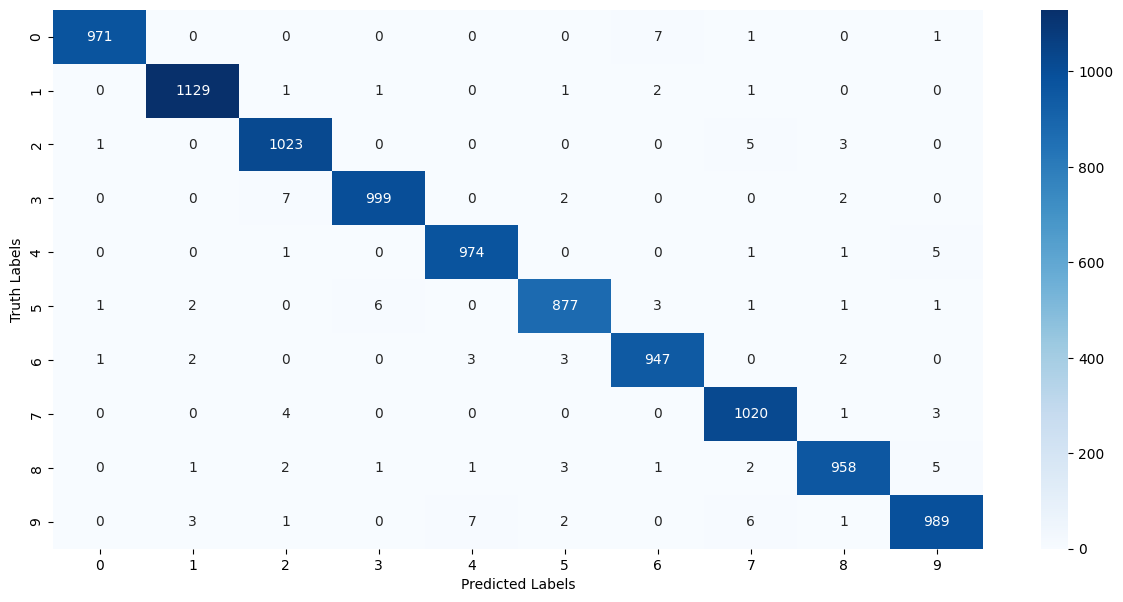

In [39]:
## Build - Heat Map with all these values
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot = True,fmt = 'd',cmap = 'Blues') #fmt = 'd'-->intgers
plt.xlabel('Predicted Labels')
plt.ylabel('Truth Labels')
plt.show()

In [ ]:
##there are 970 images of 0 predicted as 0
##there are 0 images of 0 ,predicted as the 1
##there are 0 images of 0 ,predicted as the 2
##there are 0 images of 0 ,predicted as the 3

###**Bulid the Predicted System**

In [70]:
input_image_path = input("Enter the path of the image")

input_image = cv2.imread(input_image_path) #Read the input image
print(input_image)


Enter the path of the image/content/img_MNIST-9.png
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


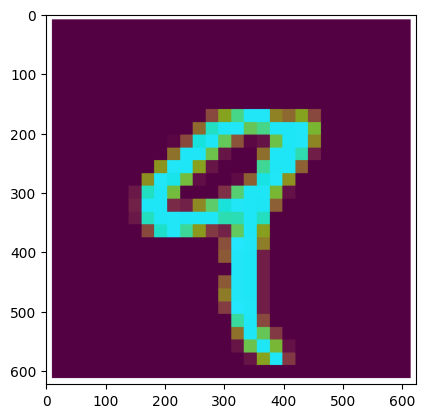

In [71]:

plt.imshow(input_image)

In [72]:

input_image.shape

(623, 623, 3)

In [73]:

##Now we should convrt into the gray scale image and rnormlaize and re-size image
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)


In [74]:

grayscale.shape

(623, 623)

In [75]:

##Now resize the input image
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize.shape

(28, 28)

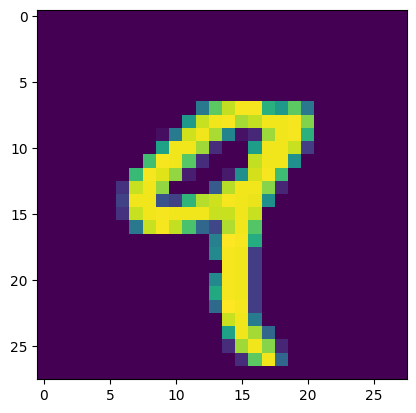

In [76]:

plt.imshow(input_image_resize)

In [77]:

###Rescale the input image
input_image_rescale = input_image_resize/255

In [78]:
type(input_image_rescale)

numpy.ndarray

In [79]:

###Bulid the predicting
image_reshaped = np.reshape(input_image_resize,[1,28,28])##Re-shape ,bcz we are giving the on;y one label to predict


In [80]:

input_prediction = cnn_model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [81]:

input_prediction_label = np.argmax(input_prediction)

In [82]:

print(input_prediction_label) #it has predicted correctly

9

**Predict the Output**

Enter the path of the image/content/mnist_img_3.png
1/1 [==============================] - 0s 28ms/step
3


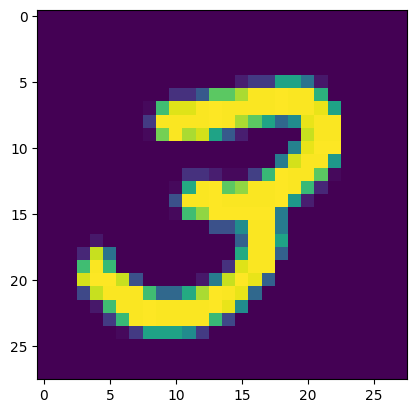

In [83]:
##Bulding the Predcitive system
input_image_path = input("Enter the path of the image")

input_image = cv2.imread(input_image_path) #Read the input image
#print(input_image)

plt.imshow(input_image)
#input_image.shape
##Now we should convrt into the gray scale image and rnormlaize and re-size image
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

grayscale.shape
##Now resize the input image
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize.shape
plt.imshow(input_image_resize)
###Rescale the input image
input_image_rescale = input_image_resize/255
###Bulid the predicting
image_reshaped = np.reshape(input_image_resize,[1,28,28])##Re-shape ,bcz we are giving the on;y one label to predict

input_prediction = cnn_model.predict(image_reshaped)
#print(input_prediction)
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label) #it has predicted correctly

In [ ]:
###Predicted the output

**Key Achievements:**

Data Preprocessing:
- Successfully performed data normalization and augmentation to enhance the dataset.

Model Architecture:
- Built a Convolutional Neural Network with multiple layers, including Conv2D, MaxPooling2D, Dense, and Flatten layers.

Model Training:
- Implemented early stopping to prevent overfitting and achieved high accuracy on the test set.

Evaluation:
- Utilized confusion matrix and heatmaps for model evaluation.

Predictive System:
- Created a functional predictive system capable of recognizing handwritten digits from input images.